In [2]:
%matplotlib inline
from functools import reduce
import pandas as pd
import os, fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as mpl
import pickle as pkl

# Meteorological Changes in the MASP

In [3]:
filename = 'Model_data.pkl'
if os.path.exists(filename) is False:
    sept = pd.read_pickle('Mod_data_sep.pkl')
    sept = sept[(sept.local_date < '2018-10-01 00:00')&(sept.local_date >'2018-08-31 23:00')]
    octo = pd.read_pickle('Mod_data_oct.pkl')
    octo = octo[octo.local_date > '2018-09-30 23:00']
    mod = pd.concat([sept,octo])
    parameters = ['tc_rcp45', 'rh_rcp45','ws_rcp45', 'wd_rcp45', 'o3_rcp45', 
                  'no_rcp45', 'no2_rcp45', 'co_rcp45','nox_rcp45', 'tc_rcp85', 
                  'rh_rcp85', 'ws_rcp85', 'wd_rcp85', 'o3_rcp85', 'no_rcp85', 
                  'no2_rcp85', 'co_rcp85',  'nox_rcp85']
    for p in parameters:
        mod[p] = mod[p].astype(float)
    mod.to_pickle(filename)
else:
    mod = pd.read_pickle(filename)
mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83277 entries, 3 to 42407
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype                            
---  ------            --------------  -----                            
 0   local_date_rcp45  83277 non-null  datetime64[ns, America/Sao_Paulo]
 1   code              83277 non-null  object                           
 2   station           83277 non-null  object                           
 3   type              83277 non-null  object                           
 4   tc_rcp45          83277 non-null  float64                          
 5   rh_rcp45          83277 non-null  float64                          
 6   ws_rcp45          83277 non-null  float64                          
 7   wd_rcp45          83277 non-null  float64                          
 8   o3_rcp45          83277 non-null  float64                          
 9   no_rcp45          83277 non-null  float64                          
 10  no2_rcp45 

In [5]:
station_types = list(mod.type.unique())
parameters = ['local_date','station','Mday','type','tc','rh','ws','wd',
              'tc_rcp45', 'rh_rcp45','ws_rcp45', 'wd_rcp45',
              'tc_rcp85', 'rh_rcp85', 'ws_rcp85', 'wd_rcp85']
met = mod[parameters]
met.loc[:,'Mday'] = met.local_date.dt.strftime('%b-%d %H:00')
met.set_index('local_date',inplace=True)
met.to_csv('met_rcp_changes.csv')
met

/Users/adelgado/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,station,Mday,type,tc,rh,ws,wd,tc_rcp45,rh_rcp45,ws_rcp45,wd_rcp45,tc_rcp85,rh_rcp85,ws_rcp85,wd_rcp85
local_date,,,,,,,,,,,,,,,
2018-09-01 00:00:00-03:00,Campinas-Taquaral,Sep-01 00:00,Regional urban,23.170960,48.414543,1.706224,85.133675,20.036194,76.383090,5.391182,107.563675,22.961304,56.654010,2.338292,105.571900
2018-09-01 01:00:00-03:00,Campinas-Taquaral,Sep-01 01:00,Regional urban,22.573456,50.140305,1.599555,96.246210,19.931550,76.185620,5.231702,105.042010,22.543182,58.755955,1.914259,80.653400
2018-09-01 02:00:00-03:00,Campinas-Taquaral,Sep-01 02:00,Regional urban,22.253052,49.966400,1.567740,74.746180,19.731781,74.332960,4.875285,101.411180,22.044006,57.291565,1.795285,30.155952
2018-09-01 03:00:00-03:00,Campinas-Taquaral,Sep-01 03:00,Regional urban,22.131866,48.917725,1.890807,71.415740,19.453186,75.645645,4.480856,100.521810,21.499756,58.648710,1.199989,13.679360
2018-09-01 04:00:00-03:00,Campinas-Taquaral,Sep-01 04:00,Regional urban,21.511047,50.211845,1.009384,56.404404,19.179932,77.573750,4.171053,98.020424,21.186676,59.630780,1.983292,20.496070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-31 16:00:00-03:00,Guarulhos,Oct-31 16:00,Urban,30.034150,46.556812,2.669371,279.935200,21.294860,71.728260,5.839748,125.455220,20.805786,91.244920,0.965618,193.358280
2018-10-31 17:00:00-03:00,Guarulhos,Oct-31 17:00,Urban,27.969513,53.412210,2.400488,139.484530,20.548950,74.755590,6.122165,135.997590,20.523071,87.387665,2.435385,143.887630
2018-10-31 18:00:00-03:00,Guarulhos,Oct-31 18:00,Urban,26.780334,58.910072,4.144518,177.818680,19.463348,78.255005,5.539034,131.747090,20.116669,88.273865,1.918191,155.260000


In [160]:
def plot_type(met,alpha,para, ylabel,filename, station_types, n_yticks, path='./'):
    fig, ax = plt.subplots(len(station_types), figsize=(8,8),sharex=True,gridspec_kw={'hspace':.25})
    for i,t in enumerate(station_types):
        mean = met[met.type == t].resample('D').mean()
        mean.plot(y=[para,para+'_rcp45',para+'_rcp85'],style=['g','c','#D22523'],
                  lw=3, alpha=.7,ax=ax[i], legend=False)
        std = met[met.type == t].resample('D').std()
        ax[i].fill_between(mean.index, mean[para]+std[para], mean[para]-std[para], color='g', alpha=alpha)
        ax[i].fill_between(mean.index, mean[para+'_rcp45']+std[para+'_rcp45'], 
                           mean[para+'_rcp45']-std[para+'_rcp45'], color='c', alpha=alpha)
        ax[i].fill_between(mean.index, mean[para+'_rcp85']+std[para+'_rcp85'], 
                           mean[para+'_rcp85']-std[para+'_rcp85'], color='#D22523', alpha=alpha)
        ax[i].set_title(t,size=8, loc='left')
        ax[0].xaxis.set_major_formatter(md.DateFormatter('%d'))
        ax[0].xaxis.set_major_locator(md.DayLocator(np.arange(0,31,4)))
        ax[0].xaxis.set_minor_locator(md.MonthLocator())
        ax[0].xaxis.set_minor_formatter(md.DateFormatter('\n%b'))
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(n_yticks))
        ax[2].set_ylabel(ylabel)
        ax[len(station_types)-1].legend(['2018', "RCP 4.5 (2030)","RCP 8.5 (2030)"], fontsize=5,
                                       ncol = 3)
        ax[i].set_xlabel('Local Time')
    fig.savefig(path+filename+'.pdf', bbox_inches='tight', facecolor='w')

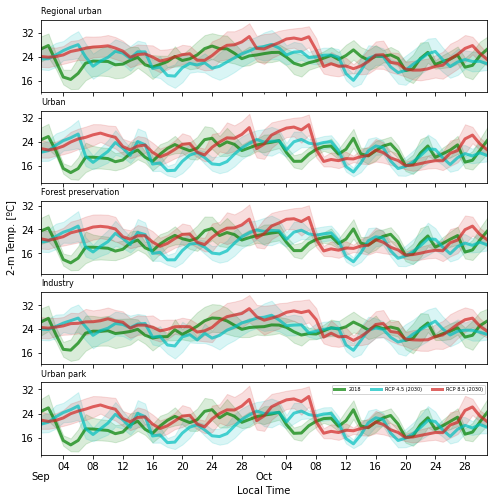

In [161]:
plot_type(met, alpha=.15, para='tc', ylabel='2-m Temp. [ºC]',filename='tc_change', station_types=station_types, n_yticks = 4,
         path = '../4_Draft_Report/Dissertation/fig/')

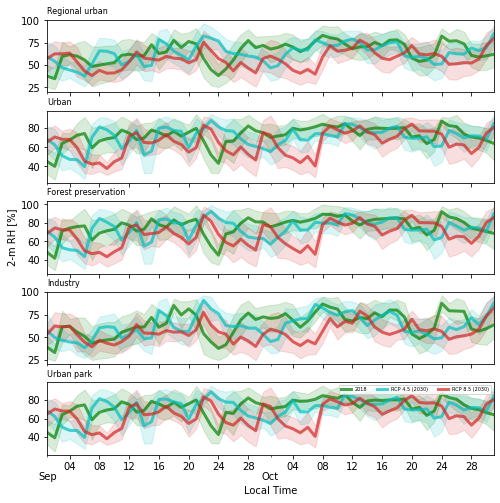

In [162]:
plot_type(met, alpha=.15, para='rh', ylabel='2-m RH [%]',filename='rh_change', 
          station_types=station_types, n_yticks = 4,
          path = '../4_Draft_Report/Dissertation/fig/')

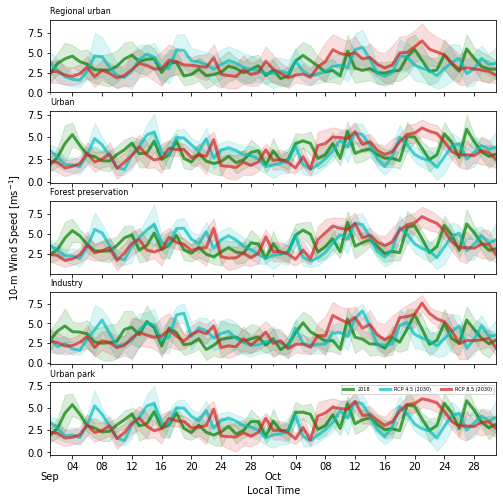

In [163]:
plot_type(met, alpha=.15, para='ws', ylabel='10-m Wind Speed [ms$^{-1}$]',filename='ws_change', 
          station_types=station_types, n_yticks = 4,
          path = '../4_Draft_Report/Dissertation/fig/')

## Rain in IAG station and others

In [12]:
stations = pd.read_csv('../1_ObsData/stations.csv')
not_stations = ['Santos',
                'Santos-Ponta da Praia',
                'Cubatão-Centro',
                'Cubatão-Vale do Mogi',
                'Cubatão-V.Parisi']
stations = stations.loc[(~stations.name.isin(not_stations)) & \
                        (stations.domain =='d02')]\
            .drop('domain', axis=1).sort_values(by='code')
stations.index =stations.code
stations.head()

,name,lat,lon,code,type,abb
code,,,,,,
0,IAG,-23.651200,-46.622400,0,Forest preservation,IAG
63,Santana,-23.505993,-46.628960,63,Urban,Stna
64,Santo Amaro,-23.654977,-46.709998,64,Urban,SAm
65,Mauá,-23.668549,-46.466000,65,Urban,Maua
67,Sorocaba,-23.502427,-47.479030,67,Regional urban,Srcb


In [58]:
path = '../3_Results/rain/'
paths = !ls {path+'*.pickle'}
rain = {}
files = ['sep2018','oct2018','rcp4.5sep2030','rcp8.5sep2030','rcp4.5oct2030','rcp8.5oct2030']
for p, f in zip(paths, files):
    rain[f] = pkl.load(open(p, "rb"))
    print(p,f)

../3_Results/rain/rain_2018-09_current.pickle sep2018
../3_Results/rain/rain_2018-10_current.pickle oct2018
../3_Results/rain/rain_2030-09_rcp4_5.pickle rcp4.5sep2030
../3_Results/rain/rain_2030-09_rcp8_5.pickle rcp8.5sep2030
../3_Results/rain/rain_2030-10_rcp4_5.pickle rcp4.5oct2030
../3_Results/rain/rain_2030-10_rcp8_5.pickle rcp8.5oct2030


In [95]:
rain_stations = list(rain['sep2018'].keys())
rain_2018 = pd.DataFrame()
for s in rain_stations:
    rain_df = pd.concat([rain['sep2018'][s],rain['oct2018'][s]]).set_index('local_date').drop('date', axis=1)
    rain_df['t_rain'] = rain_df.rainc+ rain_df.rainnc
    prev_total = [rain_df.rainc[i]+rain_df.rainnc[i] if i == 0 else 
                  rain_df.rainc[i-1]+rain_df.rainnc[i-1] for i in range(len(rain_df.index))]
    rain_df['prev_total'] = prev_total
    rain_df['rr'] = rain_df.t_rain - rain_df.prev_total
    rain_df.loc[rain_df.rr < 0] = 0
    rain_2018 = pd.concat([rain_2018,rain_df]).drop(['rainc','rainnc','t_rain','prev_total'], axis=1)
    rain_2018 = rain_2018[~rain_2018.name.isin(not_stations)]
    
rain_2018['type'] = [stations[stations.code == i].type.values[0] for i in rain_2018.code]

rain_rcp45 = pd.DataFrame()
for s in rain_stations:
    rain_df = pd.concat([rain['rcp4.5sep2030'][s],rain['rcp4.5oct2030'][s]]).set_index('local_date').drop('date', axis=1)
    rain_df['t_rain'] = rain_df.rainc+ rain_df.rainnc
    prev_total = [rain_df.rainc[i]+rain_df.rainnc[i] if i == 0 else 
                  rain_df.rainc[i-1]+rain_df.rainnc[i-1] for i in range(len(rain_df.index))]
    rain_df['prev_total'] = prev_total
    rain_df['rr'] = rain_df.t_rain - rain_df.prev_total
    rain_df.loc[rain_df.rr < 0] = 0
    rain_rcp45 = pd.concat([rain_rcp45,rain_df]).drop(['rainc','rainnc','t_rain','prev_total'], axis=1)
    rain_rcp45 = rain_rcp45[~rain_rcp45.name.isin(not_stations)]
    
rain_rcp45['type'] = [stations[stations.code == i].type.values[0] for i in rain_rcp45.code]

rain_rcp85 = pd.DataFrame()
for s in rain_stations:
    rain_df = pd.concat([rain['rcp8.5sep2030'][s],rain['rcp8.5oct2030'][s]]).set_index('local_date').drop('date', axis=1)
    rain_df['t_rain'] = rain_df.rainc+ rain_df.rainnc
    prev_total = [rain_df.rainc[i]+rain_df.rainnc[i] if i == 0 else 
                  rain_df.rainc[i-1]+rain_df.rainnc[i-1] for i in range(len(rain_df.index))]
    rain_df['prev_total'] = prev_total
    rain_df['rr'] = rain_df.t_rain - rain_df.prev_total
    rain_df.loc[rain_df.rr < 0] = 0
    rain_rcp85 = pd.concat([rain_rcp85,rain_df]).drop(['rainc','rainnc','t_rain','prev_total'], axis=1)
    rain_rcp85 = rain_rcp85[~rain_rcp85.name.isin(not_stations)]
    
rain_rcp85['type'] = [stations[stations.code == i].type.values[0] for i in rain_rcp85.code]
                                                
rain_2018.reset_index(inplace=True)
rain_rcp45.reset_index(inplace=True)
rain_rcp85.reset_index(inplace=True)

rain_2018['Mday']= rain_2018.local_date.dt.strftime('%b-%d %H:00')
rain_rcp45['Mday']= rain_rcp45.local_date.dt.strftime('%b-%d %H:00')
rain_rcp85['Mday']= rain_rcp85.local_date.dt.strftime('%b-%d %H:00')


In [121]:
rain_2018.resample

,local_date,code,name,rr,type,Mday
0,2018-08-31 21:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 21:00
1,2018-08-31 22:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 22:00
2,2018-08-31 23:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 23:00
3,2018-09-01 00:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 00:00
4,2018-09-01 01:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 01:00
...,...,...,...,...,...,...
83498,2018-10-31 16:00:00-03:00,280,Taubaté,0.000000,Regional urban,Oct-31 16:00
83499,2018-10-31 17:00:00-03:00,280,Taubaté,0.016975,Regional urban,Oct-31 17:00
83500,2018-10-31 18:00:00-03:00,280,Taubaté,2.157875,Regional urban,Oct-31 18:00
83501,2018-10-31 19:00:00-03:00,280,Taubaté,0.392899,Regional urban,Oct-31 19:00


In [97]:
rain_rcp45

,local_date,code,name,rr,type,Mday
0,2030-08-31 21:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 21:00
1,2030-08-31 22:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 22:00
2,2030-08-31 23:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 23:00
3,2030-09-01 00:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 00:00
4,2030-09-01 01:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 01:00
...,...,...,...,...,...,...
83496,2030-10-31 16:00:00-03:00,280,Taubaté,0.430801,Regional urban,Oct-31 16:00
83497,2030-10-31 17:00:00-03:00,280,Taubaté,0.092041,Regional urban,Oct-31 17:00
83498,2030-10-31 18:00:00-03:00,280,Taubaté,0.031662,Regional urban,Oct-31 18:00
83499,2030-10-31 19:00:00-03:00,280,Taubaté,0.258759,Regional urban,Oct-31 19:00


In [98]:
rain_rcp85

,local_date,code,name,rr,type,Mday
0,2030-08-31 21:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 21:00
1,2030-08-31 22:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 22:00
2,2030-08-31 23:00:00-03:00,290,Americana,0.000000,Regional urban,Aug-31 23:00
3,2030-09-01 00:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 00:00
4,2030-09-01 01:00:00-03:00,290,Americana,0.000000,Regional urban,Sep-01 01:00
...,...,...,...,...,...,...
83495,2030-10-31 16:00:00-03:00,280,Taubaté,0.543686,Regional urban,Oct-31 16:00
83496,2030-10-31 17:00:00-03:00,280,Taubaté,1.265747,Regional urban,Oct-31 17:00
83497,2030-10-31 18:00:00-03:00,280,Taubaté,3.859043,Regional urban,Oct-31 18:00
83498,2030-10-31 19:00:00-03:00,280,Taubaté,1.311092,Regional urban,Oct-31 19:00


In [143]:
by = ['Mday','name', 'code','name','type']
rain_mod = rain_rcp45.merge(rain_rcp85, on = by, 
           suffixes=('_rcp45','_rcp85'), 
           left_index=True, right_index=True).merge(rain_2018, on = by, left_index=True, right_index=True)
rain_mod.set_index('local_date', inplace=True)
rain_mod.to_pickle('rain_mod.pkl')
rain_mod = rain_mod
rain_mod['day'] = pd.to_datetime(rain_mod.index.strftime('%Y-%m-%d'), format='%Y-%m-%d')
#rain_mod['day'] = pd.to_datetime(rain_mod['day'], format='%Y-%m-%d')
rain_mod = rain_mod.groupby(['day','name','type']).sum().reset_index().set_index('day')
rain_mod

,name,type,code,rr_rcp45,rr_rcp85,rr
day,,,,,,
2018-08-31,Americana,Regional urban,870,0.000000,0.000000,0.000000
2018-08-31,Araraquara,Regional urban,318,0.000000,0.000000,0.000000
2018-08-31,Cambuci,Urban,270,0.000000,0.000000,0.000000
2018-08-31,Campinas-Centro,Regional urban,267,0.000000,0.000000,0.000000
2018-08-31,Campinas-Taquaral,Regional urban,828,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2018-10-31,Sorocaba,Regional urban,1407,17.750312,8.442238,2.951500
2018-10-31,São Caetano do Sul,Urban,1634,6.633344,2.937605,0.045264
2018-10-31,Taboão da Serra,Urban,2163,8.340033,7.960049,0.419384


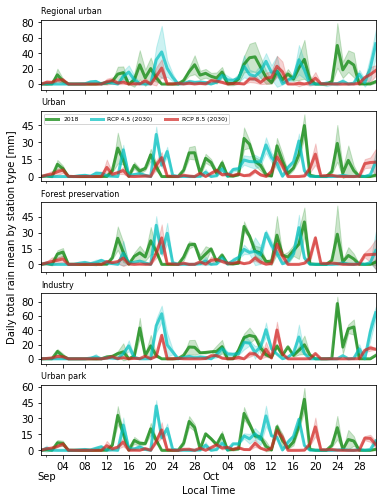

In [159]:
fig, ax = plt.subplots(len(station_types), figsize=(6,8), sharex=True, gridspec_kw={'hspace':0.3})
alpha = .2
for i,t in enumerate(station_types):
    mean = rain_mod[rain_mod.type == t].resample('D').mean()
    mean.plot(y=['rr','rr_rcp45','rr_rcp85'],style=['g','c','#D22523'],
                  lw=3, alpha=.7,ax=ax[i], legend=False)
    std = rain_mod[rain_mod.type == t].resample('D').std()
    ax[i].fill_between(mean.index, mean['rr']+std['rr'], mean['rr']-std['rr'], color='g', alpha=alpha)
    ax[i].fill_between(mean.index, mean['rr_rcp45']+std['rr_rcp45'], mean['rr_rcp45']-std['rr_rcp45'], 
                       color='c', alpha=alpha)
    ax[i].fill_between(mean.index, mean['rr_rcp85']+std['rr_rcp85'], 
                           mean['rr_rcp85']-std['rr_rcp85'], color='#D22523', alpha=alpha)
    ax[i].set_title(t,size=8, loc='left')
    ax[0].xaxis.set_major_formatter(md.DateFormatter('%d'))
    ax[0].xaxis.set_major_locator(md.DayLocator(np.arange(0,31,4)))
    ax[0].xaxis.set_minor_locator(md.MonthLocator())
    ax[0].xaxis.set_minor_formatter(md.DateFormatter('\n%b'))
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(6))
    ax[2].set_ylabel('Daily total rain mean by station type [mm]')
    ax[1].legend(['2018', "RCP 4.5 (2030)","RCP 8.5 (2030)"], fontsize=6, loc=2,
                                       ncol = 3)
    ax[i].set_xlabel('Local Time')

    fig.savefig('../4_Draft_Report/Dissertation/fig/rain_change_all.pdf', bbox_inches='tight', facecolor='w')    

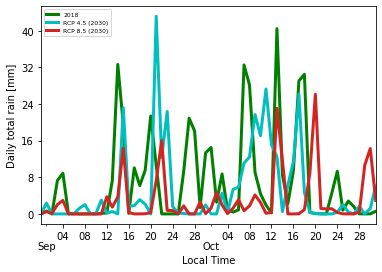

In [172]:
fig,ax = plt.subplots()
rain_mod[rain_mod.name =='IAG'].plot(y=['rr','rr_rcp45','rr_rcp85'], ax= ax,
                                    style=['g','c','#D22523'],lw=3)
ax.xaxis.set_major_formatter(md.DateFormatter('%d'))
ax.xaxis.set_major_locator(md.DayLocator(np.arange(0,31,4)))
ax.xaxis.set_minor_locator(md.MonthLocator())
ax.xaxis.set_minor_formatter(md.DateFormatter('\n%b'))
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Daily total rain [mm]')
ax.set_xlabel('Local Time')
ax.legend(['2018', "RCP 4.5 (2030)","RCP 8.5 (2030)"], fontsize=6, loc=2,
                                       ncol = 1)
fig.savefig('../4_Draft_Report/Dissertation/fig/rain_change_iag.pdf', bbox_inches='tight', facecolor='w')